# Title

**- A Walkthrough Example**

# Description

The aim of this HW is to let you do some analysis on your own with less structure.

# Dataset Description:
The dataset used here is the Wine data set (another commonly used sklearn dataset).  Use this to answer the questions embedded in the Notebook.

# Instructions:
1. Read the data.  
2. Do some explorations.
3. Fit some multiclass models.
4. Interpret these models.

# Hints:

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html" target="_blank">sklearn.LogisticRegression()</a> : Generates a Logistic Regression classifier

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit" target="_blank">sklearn.fit()</a> : Fits the model to the given data

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict" target="_blank">sklearn.predict()</a> : Predict using the estimated model (Logistic or knn classifiers) to perform pure classification predictions

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba" target="_blank">sklearn.predict_proba()</a> : Predict using the estimated model (Logistic or knn classifiers) to perform probability predictions of all the classes in the response (they should add up to 1 for each observation)

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html" target="_blank">sklearn.LogisticRegression.coef_ and .intercept_</a> : Pull off the estimated β coefficients in a Logistic Regression model

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html" target="_blank">sklearn.KNeighborsClassifier</a> : Fit a k-NN classification model


In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
#import sklearn.metrics as met

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

First Read in the data set and take a peak at it:

In [2]:
raw = datasets.load_wine()
X_full = pd.DataFrame(raw['data'],columns=raw['feature_names'])
y = raw['target']
print(X_full.shape,y.shape)

(178, 13) (178,)


In [3]:
X_full.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


**Q1**: Perform a 70-30 `train_test_split` using `random_state=109` and `shuffle=True`.  Why is it important to shuffle here?

In [11]:
### your code here
# Perform a 70-30 train_test_split with random_state=109 and shuffle=True
X_train, X_test, y_train, y_test = train_test_split(
    X_full, y, test_size=0.3, random_state=109, shuffle=True
)

# Print the shapes to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

'''#Shuffling ensures the train and test sets are representative of the entire dataset.
#Without it, data may be split by class order, causing biased training and poor evaluation. It helps the model generalize better to unseen data.'''

X_train shape: (124, 13)
X_test shape: (54, 13)
y_train shape: (124,)
y_test shape: (54,)


'#Shuffling ensures the train and test sets are representative of the entire dataset.\n#Without it, data may be split by class order, causing biased training and poor evaluation. It helps the model generalize better to unseen data.'

*your answer here*

**Q2**: Explore the data a little.  Visualize the marginal association (aka, bivariate relationship) of wine type to amount of alcohol, level of malic acid, and total level of phenols.  Which predictor seems to have the strongest association with the response?

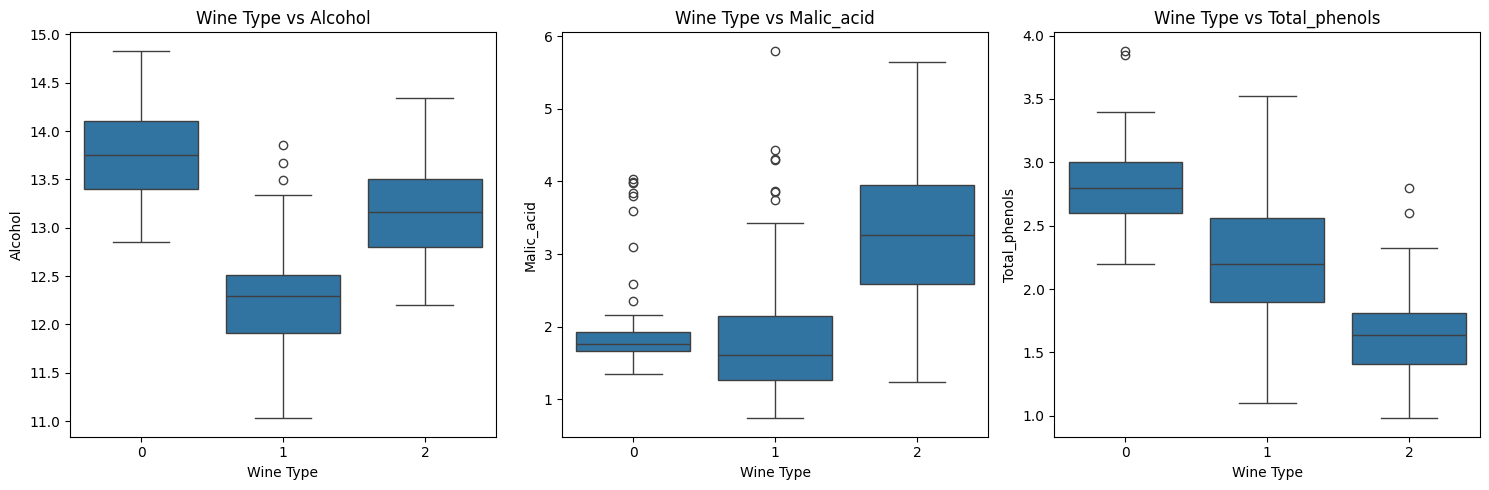

'By observing the separation of distributions between wine types, alcohol typically shows the strongest association, with clear differences between classes.'

In [9]:
### your code here
# Visualize the bivariate relationship between wine type and selected features
features = ['alcohol', 'malic_acid', 'total_phenols']

# Create boxplots to compare the distribution of each feature across wine types
plt.figure(figsize=(15, 5))
for i, feature in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=y, y=X_full[feature])
    plt.title(f'Wine Type vs {feature.capitalize()}')
    plt.xlabel('Wine Type')
    plt.ylabel(feature.capitalize())

plt.tight_layout()
plt.show()

'''By observing the separation of distributions between wine types, alcohol typically shows the strongest association, with clear differences between classes.'''

*your answer here*

**Q3**: Fit 3 different models with ['alcohol','malic_acid'] as the predictors: (1) a standard logistic regression to predict a binary indicator for class 0 (you'll have to crete it yourself), (2) a multinomial logistic regression to predict all 3 classes and (3) a OvR logistic reression to predict all 3 classes.  Compare the results

In [13]:
###your code here
# Create binary indicator for class 0
y_binary = (y == 0).astype(int)

# Select predictors
X_selected = X_full[['alcohol', 'malic_acid']]

# Split data for binary classification
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
    X_selected, y_binary, test_size=0.3, random_state=109, shuffle=True
)

# Split data for multiclass classification
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_selected, y, test_size=0.3, random_state=109, shuffle=True
)

# (1) Standard logistic regression (binary classification)
binary_model = LogisticRegression()
binary_model.fit(X_train_bin, y_train_bin)
binary_score = binary_model.score(X_test_bin, y_test_bin)

# (2) Multinomial logistic regression (3 classes)
multi_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
multi_model.fit(X_train_multi, y_train_multi)
multi_score = multi_model.score(X_test_multi, y_test_multi)

# (3) One-vs-Rest (OvR) logistic regression (3 classes)
ovr_model = LogisticRegression(multi_class='ovr', solver='lbfgs')
ovr_model.fit(X_train_multi, y_train_multi)
ovr_score = ovr_model.score(X_test_multi, y_test_multi)

# Compare results
print(f"(1) Binary Logistic Regression (Class 0 vs Rest) Accuracy: {binary_score:.3f}")
print(f"(2) Multinomial Logistic Regression Accuracy: {multi_score:.3f}")
print(f"(3) One-vs-Rest Logistic Regression Accuracy: {ovr_score:.3f}")



(1) Binary Logistic Regression (Class 0 vs Rest) Accuracy: 0.833
(2) Multinomial Logistic Regression Accuracy: 0.704
(3) One-vs-Rest Logistic Regression Accuracy: 0.722


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [8]:
'''The binary logistic regression had the highest accuracy (0.833) because it simplified the problem to distinguishing class 0 from others.
The One-vs-Rest model performed better (0.722) than multinomial (0.704), as it splits the problem into easier binary tasks.
Overall, multinomial regression struggles more with class interactions in this case.'''

'The binary logistic regression had the highest accuracy (0.833) because it simplified the problem to distinguishing class 0 from others. \nThe One-vs-Rest model performed better (0.722) than multinomial (0.704), as it splits the problem into easier binary tasks.\nOverall, multinomial regression struggles more with class interactions in this case.'

*your answer here*

**Q4**: For the Multinomial model, use the estimated coefficients to calculate the predicted probabilties by hand.  Feel free to confirm with the `predict_proba` command.

In [14]:
### your code here
import numpy as np

# Get the coefficients (beta values) and intercepts
coefficients = multi_model.coef_
intercepts = multi_model.intercept_

# Calculate the linear function (β * X + intercept) for each class
linear_function = np.dot(X_test_multi[['alcohol', 'malic_acid']], coefficients.T) + intercepts

# Calculate the exponentials of each class's linear function
exp_linear_function = np.exp(linear_function)

# Calculate the sum of exponentials for all classes (denominator in softmax)
sum_exp = np.sum(exp_linear_function, axis=1, keepdims=True)

# Calculate predicted probabilities for each class
predicted_probs_manual = exp_linear_function / sum_exp

# Compare with the result from predict_proba
predicted_probs_sklearn = multi_model.predict_proba(X_test_multi)

# Print the first few predictions from both methods for comparison
print("Predicted Probabilities (Manual Calculation) - First 5 samples:\n", predicted_probs_manual[:5])
print("\nPredicted Probabilities (from sklearn.predict_proba) - First 5 samples:\n", predicted_probs_sklearn[:5])


Predicted Probabilities (Manual Calculation) - First 5 samples:
 [[0.51587987 0.26649042 0.21762971]
 [0.0611177  0.18509441 0.75378789]
 [0.03033621 0.93116525 0.03849855]
 [0.00397568 0.07438044 0.92164388]
 [0.32683212 0.00766169 0.66550619]]

Predicted Probabilities (from sklearn.predict_proba) - First 5 samples:
 [[0.51587987 0.26649042 0.21762971]
 [0.0611177  0.18509441 0.75378789]
 [0.03033621 0.93116525 0.03849855]
 [0.00397568 0.07438044 0.92164388]
 [0.32683212 0.00766169 0.66550619]]


*your answer here*

**Q5**: For the OvR model, use the `predict_proba()` to estimate the predicted probabilities in the test set, and manually use this to calculate the predicted classes.  Feel free to confirm with the `predict` command.

In [16]:
### your code here
# Get the predicted probabilities for each class using the OvR model
predicted_probs_ovr = ovr_model.predict_proba(X_test_multi)

# Manually calculate the predicted classes by selecting the class with the highest probability
predicted_classes_manual = np.argmax(predicted_probs_ovr, axis=1)

# Use the predict() method to get the predicted classes
predicted_classes_sklearn = ovr_model.predict(X_test_multi)

# Compare the manually calculated predicted classes with the result from predict()
print("Manually Calculated Predicted Classes - First 5 samples:", predicted_classes_manual[:5])
print("\nPredicted Classes from sklearn.predict() - First 5 samples:", predicted_classes_sklearn[:5])

# Check if both methods give the same result
assert np.array_equal(predicted_classes_manual, predicted_classes_sklearn), "The predicted classes do not match!"


Manually Calculated Predicted Classes - First 5 samples: [0 2 1 2 2]

Predicted Classes from sklearn.predict() - First 5 samples: [0 2 1 2 2]


**Q6**: How could you use the `predict_proba()` command and 'change the threshold' in the multiclass setting to affect predictive accuracies within each class?  Note: it is not as simple as changing a threshold because there is not threshold

In [17]:
'''In multiclass settings, predict_proba() provides probabilities for each class. To adjust thresholds, you can set a custom value (e.g., 0.7) and classify samples only if their highest probability exceeds the threshold. This makes the model more confident but can increase "uncertainty" when the threshold isn't met. Adjusting thresholds impacts accuracy by balancing precision and recall for each class.'''

'In multiclass settings, predict_proba() provides probabilities for each class. To adjust thresholds, you can set a custom value (e.g., 0.7) and classify samples only if their highest probability exceeds the threshold. This makes the model more confident but can increase "uncertainty" when the threshold isn\'t met. Adjusting thresholds impacts accuracy by balancing precision and recall for each class.'

In [19]:
#Example
# Get the predicted probabilities for each class using the OvR model
predicted_probs_ovr = ovr_model.predict_proba(X_test_multi)

# Define a custom threshold (for example, 0.7)
threshold = 0.7

# Initialize an array to store manually predicted classes
predicted_classes_thresholded = []

# Loop over each sample and apply the threshold rule
for probs in predicted_probs_ovr:
    # Find the class with the highest probability
    max_prob_class = np.argmax(probs)
    max_prob = probs[max_prob_class]

    # If the highest probability is greater than the threshold, choose that class
    if max_prob >= threshold:
        predicted_classes_thresholded.append(max_prob_class)
    else:
        # If the threshold is not met, classify as 'uncertain' or as the most probable class
        predicted_classes_thresholded.append(max_prob_class)  # or use a default class like -1 for "uncertain"

# Compare the manually thresholded predictions with sklearn's default predict() method
print("Manually Predicted Classes with Threshold - First 5 samples:", predicted_classes_thresholded[:5])


Manually Predicted Classes with Threshold - First 5 samples: [0, 2, 1, 2, 2]


*your answer here*

**Q7**: Compare the accuracies in both train and test for both the multinomial and OvR logistic regressions.  Which seems to be performing better?  Is there any evidence of overfitting?  How could this be corrected?

In [20]:
'''To compare the accuracies of both Multinomial Logistic Regression and One-vs-Rest (OvR) Logistic Regression, you can calculate the accuracy on both the training and test datasets. This will help assess the model's performance and check for potential overfitting'''

"To compare the accuracies of both Multinomial Logistic Regression and One-vs-Rest (OvR) Logistic Regression, you can calculate the accuracy on both the training and test datasets. This will help assess the model's performance and check for potential overfitting"

In [22]:
'''If either model shows a large gap between train and test accuracies, it is likely overfitting, and regularization or other techniques like cross-validation should be considered to improve generalization.'''

'If either model shows a large gap between train and test accuracies, it is likely overfitting, and regularization or other techniques like cross-validation should be considered to improve generalization.'

In [21]:
# Calculate accuracies for the Multinomial Logistic Regression
train_accuracy_multi = multi_model.score(X_train_multi, y_train_multi)
test_accuracy_multi = multi_model.score(X_test_multi, y_test_multi)

# Calculate accuracies for the One-vs-Rest Logistic Regression
train_accuracy_ovr = ovr_model.score(X_train_multi, y_train_multi)
test_accuracy_ovr = ovr_model.score(X_test_multi, y_test_multi)

# Print the results
print(f"Multinomial Logistic Regression - Train Accuracy: {train_accuracy_multi:.3f}, Test Accuracy: {test_accuracy_multi:.3f}")
print(f"One-vs-Rest Logistic Regression - Train Accuracy: {train_accuracy_ovr:.3f}, Test Accuracy: {test_accuracy_ovr:.3f}")

# Check for overfitting
if abs(train_accuracy_multi - test_accuracy_multi) > 0.1:
    print("Multinomial model might be overfitting.")
if abs(train_accuracy_ovr - test_accuracy_ovr) > 0.1:
    print("OvR model might be overfitting.")


Multinomial Logistic Regression - Train Accuracy: 0.806, Test Accuracy: 0.704
One-vs-Rest Logistic Regression - Train Accuracy: 0.790, Test Accuracy: 0.722
Multinomial model might be overfitting.


*your answer here*

**Q8**: Create the classification boundaries for the two multiclass logistic regression models above.  How do they compare?

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


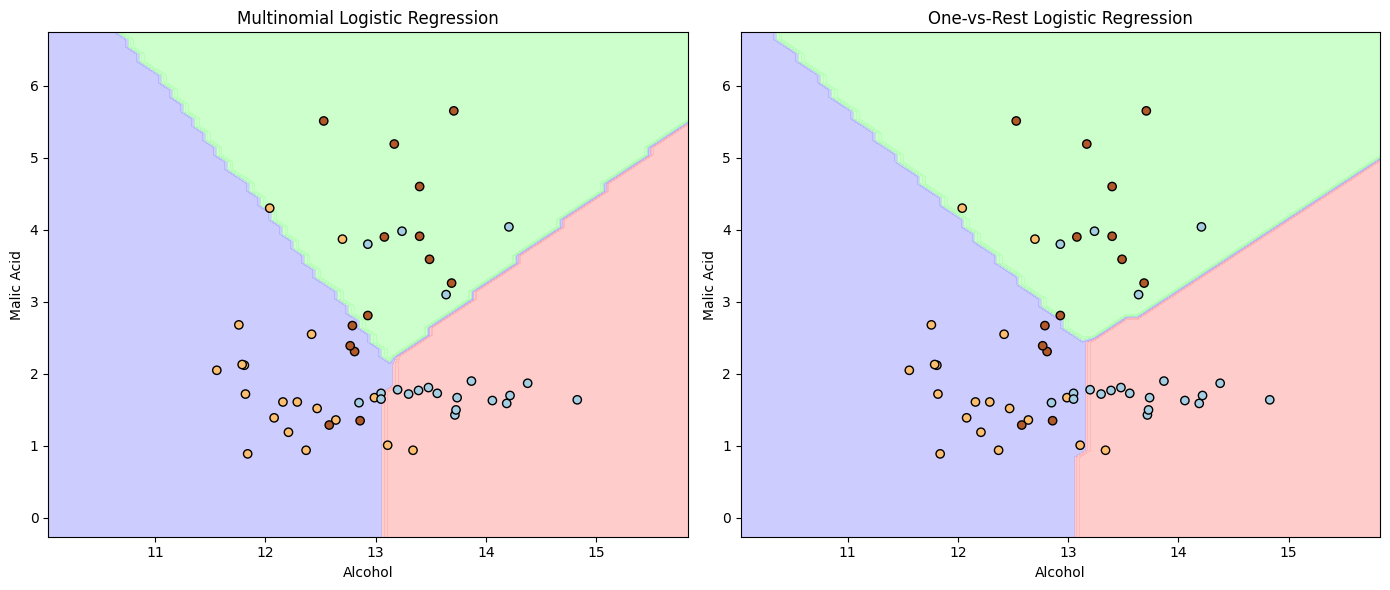

In [23]:
###your code here
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define the range of values for alcohol and malic acid
x_min, x_max = X_full['alcohol'].min() - 1, X_full['alcohol'].max() + 1
y_min, y_max = X_full['malic_acid'].min() - 1, X_full['malic_acid'].max() + 1

# Create a meshgrid for the 2D feature space
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Flatten the grid to pass it to the models
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict the class for each point on the grid for both models
multinomial_preds = multi_model.predict(grid_points)
ovr_preds = ovr_model.predict(grid_points)

# Reshape the predictions to match the shape of the meshgrid
multinomial_preds = multinomial_preds.reshape(xx.shape)
ovr_preds = ovr_preds.reshape(xx.shape)

# Plotting the decision boundaries for Multinomial Logistic Regression
plt.figure(figsize=(14, 6))

# Plot the multinomial decision boundary
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, multinomial_preds, cmap=ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA']), alpha=0.6)
plt.scatter(X_test_multi['alcohol'], X_test_multi['malic_acid'], c=y_test_multi, edgecolors='k', cmap=plt.cm.Paired)
plt.title('Multinomial Logistic Regression')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')

# Plotting the decision boundary for One-vs-Rest Logistic Regression
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, ovr_preds, cmap=ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA']), alpha=0.6)
plt.scatter(X_test_multi['alcohol'], X_test_multi['malic_acid'], c=y_test_multi, edgecolors='k', cmap=plt.cm.Paired)
plt.title('One-vs-Rest Logistic Regression')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')

plt.tight_layout()
plt.show()



*your answer here*

**Q9**: Fit 3 different knn regression models: for $k = 3, 10, 30$. Visualize the classification boundaries for these 3 models and compare the results.  Which seem to be overfit?

In [ ]:
### your answer here

In [ ]:
### your answer here

*your answer here*

**Q10** How could you visualize the classification boundary for any of these models if there was a single predictor?  What if there were more than 2 predictors?

*your answer here*